### 1. 삼성전자 뉴스 기사제목 100개 가져오기

#### 1-1. 이중 반복문을 이용하여 기사제목 100개 출력하기

1. url 10개 반복 requests get
2. soup(html)에서 select한 a태그 10개 반복 title 파싱하여 출력



In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
tag_str = []
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=1&pd=0&ds=&de=&cluster_rank=11&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='
for i in range(1,100,10):
    resp = requests.get(url+str(i))
    soup = BeautifulSoup(resp.content)
    a_tag = soup.select('a.news_tit')

    for i in a_tag:
        print(i['title'])

품격↑ 에너지↓…삼성전자 시스템에어컨 인피니트 라인 출시
“삼성전자, 일본에 3000억 규모 반도체 시설 투자”
한국은행-삼성전자, 중앙은행 디지털 화폐 기술연구 '맞손'
삼성전자, 日에 반도체 개발거점 신설…한일 협력 강화
삼성전자, 비스포크 무풍 시스템에어컨 인피니트 라인 출시
삼성전자, 한국은행과 CBDC 연구 협력
삼성전자, 반도체 새 판짜기…日투자·머스크 회동 [글로벌 뉴스픽]
이재용 삼성전자 회장, 美서 일론 머스크 만났다
삼성전자·테슬라 협력 확대 기대감...이재용, 머스크와 만났다
“삼성전자 스마트폰 싸움에 포로 잡혔네” 얻어 터지는 카드사들[머니뭐니]
“삼성전자, 3000억 들여 일본에 반도체 개발거점 신설한다"
한은-삼성전자, CBDC 기술연구 협력 MOU
삼성전자 에어컨 1분기 시장 점유율 48.6%
무풍 에어컨 인기에…삼성전자 1분기 국내 에어컨시장 점유율 48.6%
함영주 회장, 자카르타서 삼성전자와 손잡고 K-금융 전파
쿠첸, 삼성전자 IoT 기술 ‘스마트싱스’ 연동한다
삼성전자, 무풍 덕분에 '활짝'…1분기 에어컨 점유율 절반
하나금융, 인도네시아서 ‘라인뱅크·삼성전자’ 체험 행사
[단독] 네이버와 손잡은 삼성전자…'삼성 전용 챗GPT' 만든다
[칩톡]반도체 미래 성장 핵심은 '車'…삼성전자·SK하이닉스 사업 박차
K-금융 인니로 뻗는다… 하나금융, ‘라인뱅크×삼성전자’ 행사
삼성전자 “1분기 국내 에어컨 시장점유율 48.6% 기록”
구글까지 가세…'활짝 펼친' 폴더블폰 시장, 삼성전자 숨은 무기는?
삼성전자, 요코하마에 반도체 팹 세운다… 한-일 '반도체 동맹'
삼성전자, 업계 최초 'CXL 2.0 D램' 개발…연내 양산 목표
하나금융, 인도네시아 '라인뱅크'ㆍ삼성전자와 혁신금융 선봬
하나금융-네이버-삼성전자, 인니서 디지털 '맞손'
삼성전자-한국은행, 오프라인 CBDC 기술 연구 협력 MOU
삼성전자 X 한국은행, 오프라인 중앙은행디지털화폐 기술연구 협력 위해 '맞손'
삼성전자가 일본에 R&D 거점 구축?
삼성전자, 한국은행과 중

#### 1-2. 기사제목 저장할 리스트 선언하여 append하여 저장하기

In [4]:
titles = []

In [5]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=1&pd=0&ds=&de=&cluster_rank=11&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='
for i in range(1,100,10):
    resp = requests.get(url+str(i))
    soup = BeautifulSoup(resp.content)
    a_tag = soup.select('a.news_tit')

    for i in a_tag:
        titles.append(i['title'])

In [6]:
len(titles)

100

#### 1-3. 긴 url 쿼리스트링 따로 분리하기

In [7]:
titles = []

In [8]:
for i in range(10):
    start = i*10 + 1

    url = 'https://search.naver.com/search.naver?'

    params = {
    'where':'news',
    'query':'삼성전자',
    'start': start
    }

    resp = requests.get(url, params=params)



titles

[]

## 2. 알라딘 베스트셀러 top50 종합 도서 _ 제목, 작가, 가격

### 2-1. 종합 top50 도서 _ 제목과 가격 정보만 가져오기
- 작가 정보가 까다로움

In [9]:
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'

resp = requests.get(url)
resp

<Response [200]>

In [10]:
# 내가 한 방식
import re
import pandas as pd
tits = {'제목':[], '가격':[]}

soup = BeautifulSoup(resp.content)
tit_tag = soup.select('li a.bo3')
price_tag = soup.select('li span.ss_p2')

for i,j in zip(tit_tag, price_tag):
    tits['제목'].append(re.sub('(<([^>]+)>)', '', str(i.b)))
    tits['가격'].append(re.sub('(<([^>]+)>)', '', str(j.b)))

pd.DataFrame(tits)

,제목,가격
0,세이노의 가르침,"6,480원"
1,화산귀환 3,"14,400원"
2,각각의 계절,"13,500원"
3,도둑맞은 집중력,"16,920원"
4,모든 삶은 흐른다,"15,120원"
5,사장학개론,"22,500원"
6,나의 돈 많은 고등학교 친구,"16,200원"
7,내가 가진 것을 세상이 원하게 하라,"15,750원"
8,태양 왕 수바: 수박의 전설,"15,120원"
9,하늘과 바람과 별과 인간,"16,020원"


In [11]:
# 강사님의 코멘트
import pandas as pd
tits = {'제목':[], '가격':[]}

soup = BeautifulSoup(resp.content)
tit_tag = soup.select('li a.bo3 b') # 하위 태그 하나 더 입력
price_tag = soup.select('li span.ss_p2 b')

for i,j in zip(tit_tag, price_tag):
    tits['제목'].append(i.text)
    tits['가격'].append(j.text)

pd.DataFrame(tits)

,제목,가격
0,세이노의 가르침,"6,480원"
1,화산귀환 3,"14,400원"
2,각각의 계절,"13,500원"
3,도둑맞은 집중력,"16,920원"
4,모든 삶은 흐른다,"15,120원"
5,사장학개론,"22,500원"
6,나의 돈 많은 고등학교 친구,"16,200원"
7,내가 가진 것을 세상이 원하게 하라,"15,750원"
8,태양 왕 수바: 수박의 전설,"15,120원"
9,하늘과 바람과 별과 인간,"16,020원"


### 2-2. 첫번째 도서의 작가 정보만 가져오기
- 까다로운 이유 : li태그가 여러개 있다. 그 중 세번째 li태그에 작가정보가 있다.
- 인덱싱을 이용해 각 묶음의 3번째꺼만 뽑아내보자.

In [12]:
# 방법1
author_tag = soup.select('div.ss_book_list')
len(author_tag)

100

In [13]:
author_tag[0]

<div class="ss_book_list"><ul>
<li><span class="ss_ht1">[<a href="/events/wevent_redirect.aspx?eventid=249404">책모양 아크릴 거울 (대상 도서 포함 3만원 이상 구매 시) </a>]</span><br/></li><li><span style="font-size: 14px;">[국내도서]</span> <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=309295168"><b>세이노의 가르침</b></a> </li>
<li><a href="/Search/wSearchResult.aspx?AuthorSearch=세이노@9156308&amp;BranchType=1">세이노</a> (지은이) | <a href="/search/wsearchresult.aspx?PublisherSearch=%eb%8d%b0%ec%9d%b4%ec%9b%90@444694&amp;BranchType=1">데이원</a> | 2023년 3월</li><li><span class="">7,200</span>원 → <span class="ss_p2"><b><span class="">6,480</span>원</b></span> (<span class="ss_p">10%</span>할인),  마일리지 <span class="ss_p">360</span>원 (<span class="ss_p">5%</span> 적립)</li><li><img border="0" src="//image.aladin.co.kr/img/common/star_s9.gif" style="vertical-align: middle;"/> (<a href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=309295168#K732831392_CommentReview">154</a>) | 세일즈포인트 :<b> 834,893</b></li>

In [14]:
author_tag[0].select('a')[2].text

'세이노'

In [15]:
# 방법2
# li 까지만 select하고, 인덱싱
author_li = author_tag[0].select('li')[2]
author_li.select('a')[0].text

'세이노'

### 2-3. 모든 도서의 작가 정보만 가져오기
- 더 까다로운 이유 : div.ss_book_list도 한 블럭에 2개씩 있으며, 어떤 블럭에는 li가 4개, 어떤 블럭에는 5개가 있다.
- 한번에 select하려고 하지말고, 나눠서 select를 여러번 하자.

### 2-4. 종합 top50 모든 도서의 제목, 작가, 가격 정보 csv로 저장하기
- 가격은 숫자로 변환하여 저장하자.

In [1]:
titles, authors, prices = [], [], []

In [ ]:
soup = BeautifulSoup(resp.content)

## 3. 알라딘 모든 카테고리 top 50 도서 정보가져오기

In [ ]:
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'

resp = requests.get(url)
resp

<Response [200]>

In [28]:
category[1]

<a href="/shop/common/wbest.aspx?BestType=Bestseller&amp;BranchType=1&amp;CID=55890">건강/취미</a>

In [ ]:
soup = BeautifulSoup(resp.content)
category = soup.select('ul.best_left_ul a')
tit, author, price = [], [], []
for i in category[:1]:
    url_tmp = i['href']
    resp_tmp = requests.get('https://www.aladin.co.kr' + url_tmp)
    soup_tmp = BeautifulSoup(resp_tmp.content)

    tag = soup_tmp.select('div.ss_book_list')
    for j in tag:
        print(j)
        # tit_tag = j.select('li a.bo3 b')
        # author_tag = j.select('a')
        # print(tit_tag)
        # print(author_tag[2])
    # tit.append(tit_tag.text)
    # author.append(author_tag.text)

tit, author


In [ ]:
cat_urls = []

In [17]:
from tqdm.notebook import tqdm

### 4. 웹툰 섬네일 가져오기

#### 이미지 크롤링의 이해  
html 안에 이미지는 없다. 이미지의 src만 있을 뿐.

- 1단계 : 섬네일 이미지 태그에서 img src 가져오기
- 2단계 : 이미지 src에 requests get하여 img 가져오기

#### 4-1) 하나의 웹툰을 정하여 해당 웹툰의 섬네일 이미지 저장하기

In [71]:
import requests
from bs4 import BeautifulSoup
import cv2
from google.colab.patches import cv2_imshow

In [47]:
img_src = []

In [ ]:
# 예시, '세이노의 가르침' 섬네일
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'

resp = requests.get(url)
soup = BeautifulSoup(resp.content)
img_tags = soup.select('img.front_cover')

# len(img_tags) # 확인
print(img_tags[0]['src'])
img_url = img_tags[0]['src']
resp = requests.get(img_url)
resp.content

In [ ]:
# resp_img.content가 섬네일 이미지

In [79]:
with open('seino_teaching.jpg', 'wb') as f:
    f.write(resp.content)

#### 4-2) 액션 페이지의 웹툰 섬네일 이미지 가져와보기
- 액션 페이지 url에 requests get하여 resp.content 가져오기
- title_tags, thumb_tags 가져오기
  
- 두 태그 같이 for문 돌면서 title, thumb_src 가져오기 
- thumb_src에 requests get 하여 섬네일 이미지(resp_img.content) 가져오기
- with open as f 로 title.jpg라는 이름으로 섬네일 이미지 파일 저장하기

In [ ]:
import requests
from bs4 import BeautifulSoup

In [81]:
!mkdir toon_thumb

In [ ]:
# 1단계 : 섬네일 이미지 태그에서 img src 가져오기
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0'

resp = requests.get(url)
soup = BeautifulSoup(resp.content)

tit_tags = soup.select('li a.bo3 b')
img_tags = soup.select('img.front_cover')

for i,j in zip(tit_tags, img_tags):
    print(i.text)
    print(j['src'])

    title = i.text

    resp_img = requests.get(j['src'])
    with open(f'toon_thumb/{title}.jpg', 'wb') as f:
        f.write(resp_img.content)


액션 페이지 url에 requests get하여 resp.content 가져오기

thumb_tags 가져오기

for문 돌면서 title, thumb_src 가져오기

thumb_src에 requests get 하여 섬네일 이미지(resp_img.content) 가져오기

with open as f 로 title.jpg라는 이름으로 섬네일 이미지 파일 저장하기

## 4-3) 종합 페이지에서 순위별 페이지를 돌면서 500위까지 도서 섬네일 이미지 저장

In [87]:
!mkdir top500_thumb

In [ ]:
import requests
from bs4 import BeautifulSoup

In [96]:
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0&page={}&cnt=1000&SortOrder=1'

for i in range(5,10):
    url_tmp = url.format(i+1)
    
    resp_tmp = requests.get(url_tmp)
    soup_tmp = BeautifulSoup(resp_tmp.content)

    tit_tags = soup_tmp.select('li a.bo3 b')
    img_tags = soup_tmp.select('img.front_cover')

    for idx, (j,k) in enumerate(zip(tit_tags, img_tags)):
        # print(idx+50*i,j,k)
        num = idx+50*i
        title = j.text.replace('/', '_')
        resp_img = requests.get(k['src'])
        with open(f'top500_thumb/{num}_{title}.jpg', 'wb') as f:
            f.write(resp_img.content)

## 4-4) 모든 카테고리를 돌면서 각 카테고리별로 500위까지의 도서 섬네일을 각 카테고리 폴더에 저장하기

In [102]:
# Category ID를 수집하면 위 코드랑 다를게 없음
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0&page=1&cnt=1000&SortOrder=1'
resp = requests.get(url)
soup = BeautifulSoup(resp.content)

cid = soup.select('ul.best_left_ul li a')
cids = []
for i in cid:
    # print(i['href'])
    cids.append(i['href'].split('CID=')[1])
print(cids)

['0', '55890', '170', '2105', '987', '8257', '2551', '4395', '798', '1', '1383', '1108', '55889', '1196', '74', '517', '1230', '1322', '13789', '656', '336', '112011', '2913', '17195', '1237', '2030', '1137', '351', '50246', '76000', '76001']


### 5. kospi200 일별시세 가져오기

#### iframe 페이지 크롤링의 이해
- iframe구조인지 파악(눈치채기) : 
    - 페이지가 바뀌는데, url이 안바뀐다. 
    - 페이지 구조상 안바뀌는게 맞는 것 같을 때
- html에서 iframe 태그 찾기 -> src 가져오기
- requests.get(iframe_src)

In [ ]:
# 날짜 :    date
# 체결가:  price
# 전일비:  diff
# 등락률:  rate
# 거래량:  volume
# 거래대금:   amount

#### 5-1) 1페이지 날짜, 체결가만 가져와서 출력하기

In [ ]:
import requests
from bs4 import BeautifulSoup

In [122]:
url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KPI200'
resp = requests.get(url)
resp

soup = BeautifulSoup(resp.content, 'lxml')
date_tags = soup.select('td.date')
price_td = soup.select('td.number_1')[::4]
print(len(price_td))

for i,j in zip(date_tags, price_td):
    print('date : {}'.format(i.text))
    print('price : {}'.format(j.text))
    print('-'*10)

6
date : 2023.05.15
price : 324.46
----------
date : 2023.05.12
price : 323.61
----------
date : 2023.05.11
price : 325.28
----------
date : 2023.05.10
price : 326.04
----------
date : 2023.05.09
price : 328.22
----------
date : 2023.05.08
price : 328.90
----------


#### 5-2) 1페이지 전체 데이터 가져와서 출력하기

In [128]:
url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KPI200'
resp = requests.get(url)
resp

soup = BeautifulSoup(resp.content, 'lxml')
date_tags = soup.select('td.date')
num_tags = soup.select('td.number_1')
rate_tags = soup.select('td.rate_down')
len(date_tags), len(num_tags), len(rate_tags)

(6, 24, 6)

In [146]:
import re
# num_tags[1].text
re.sub('\s', '', num_tags[1].text)

'+0.26%'

In [156]:
for i in range(len(date_tags)):
    print(date_tags[i].text, end=" ")

    if rate_tags[i].img['alt'] == '하락':
        print('-', re.sub('\s', '', rate_tags[i].span.text),end=" ")
    elif rate_tags[i].img['alt'] == '상승':
        print('+', re.sub('\s', '', rate_tags[i].span.text), end=" ")
        
    for j in num_tags[i*4:i*4+4]:
        print(re.sub('\s', '', j.text), end=" ")
    print('\n')

2023.05.15 + 0.85 324.46 +0.26% 88,443 4,579,932 

2023.05.12 - 1.67 323.61 -0.51% 99,540 5,121,699 

2023.05.11 - 0.76 325.28 -0.23% 99,133 5,725,482 

2023.05.10 - 2.18 326.04 -0.66% 97,557 5,631,541 

2023.05.09 - 0.68 328.22 -0.21% 90,984 5,559,999 

2023.05.08 + 2.73 328.90 +0.84% 98,841 5,998,698 



2023.01.18 312.32 1.43 -0.46% 17,830 863,755
2023.01.17 313.75 2.29 -0.72% 101,245 4,829,876
2023.01.16 316.04 2.27 +0.72% 119,827 5,136,041
2023.01.13 313.77 3.07 +0.99% 128,647 5,505,750
2023.01.12 310.70 0.32 +0.10% 130,719 6,002,834
2023.01.11 310.38 0.81 +0.26% 102,603 5,055,057


#### 5-3) 1페이지 전체 데이터 가져와서 전일비 양수, 음수 처리한다음, 모든 데이터 데이터프레임에 저장하기

In [160]:
dates, prices, diffs, rates, volumns, amounts = [], [], [], [], [], []

for i in range(len(date_tags)):
    dates.append(date_tags[i].text)

    if rate_tags[i].img['alt'] == '하락':
        diffs.append('-' + re.sub('\s', '', rate_tags[i].span.text))
    elif rate_tags[i].img['alt'] == '상승':
        diffs.append('+' + re.sub('\s', '', rate_tags[i].span.text))
        
    num_tmp = num_tags[i*4:i*4+4]
    prices.append(re.sub('\s', '', num_tmp[0].text))
    rates.append(re.sub('\s', '', num_tmp[1].text))
    volumns.append(re.sub('\s', '', num_tmp[2].text))
    amounts.append(re.sub('\s', '', num_tmp[3].text))

In [161]:
import pandas as pd

df_ksp200 = pd.DataFrame({'날짜' : dates, '체결가' : prices, '전일비' : diffs,
              '등락률' : rates, '거래량' : volumns, '거래대금' : amounts})
df_ksp200

,날짜,체결가,전일비,등락률,거래량,거래대금
0,2023.05.15,324.46,+0.85,+0.26%,"88,443","4,579,932"
1,2023.05.12,323.61,-1.67,-0.51%,"99,540","5,121,699"
2,2023.05.11,325.28,-0.76,-0.23%,"99,133","5,725,482"
3,2023.05.10,326.04,-2.18,-0.66%,"97,557","5,631,541"
4,2023.05.09,328.22,-0.68,-0.21%,"90,984","5,559,999"
5,2023.05.08,328.90,+2.73,+0.84%,"98,841","5,998,698"


#### 5-4) 전체 페이지 전체 데이터 가져와서 csv파일로 저장하기 
- 코드 시행 시점 무관하게 맨 끝페이지까지 크롤링하도록 자동화할 것.

In [ ]:
url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KPI200'
resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')



703

In [ ]:
dates, prices, diffs, rates, volumns, amounts = [], [], [], [], [], []

In [ ]:
# 마지막 페이지 정보 누락되어있을 경우 확인
last_url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KPI200&page=703'
resp = requests.get(last_url)

soup = BeautifulSoup(resp.content, 'lxml')




['2006.01.04', '2006.01.03']

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
dates, prices, diffs, rates, volumns, amounts = [], [], [], [], [], []


코스피200 일별시세:   0%|          | 0/703 [00:00<?, ?it/s]

In [ ]:
len(dates)

4214

4214

In [ ]:
import pandas as pd

df_ksp200 = pd.DataFrame({'날짜' : dates, '체결가' : prices, '전일비' : diffs,
              '등락률' : rates, '거래량' : volumns, '거래대금' : amounts})
df_ksp200

,날짜,체결가,전일비,등락률,거래량,거래대금
0,2023.01.18,310.78,-2.97,-0.95%,"37,513","1,742,388"
1,2023.01.17,313.75,-2.29,-0.72%,"101,245","4,829,876"
2,2023.01.16,316.04,2.27,+0.72%,"119,827","5,136,041"
3,2023.01.13,313.77,3.07,+0.99%,"128,647","5,505,750"
4,2023.01.12,310.70,0.32,+0.10%,"130,719","6,002,834"
...,...,...,...,...,...,...
4209,2006.01.09,180.30,-0.57,-0.32%,"191,222","4,641,279"
4210,2006.01.06,180.87,2.05,+1.15%,"206,313","4,609,858"
4211,2006.01.05,178.82,-1.09,-0.61%,"206,332","5,522,148"
4212,2006.01.04,179.91,1.10,+0.62%,"188,841","5,360,812"


In [ ]:
# (추가 과제) 네이버 금융에서 Kospi200 일별시세 정보를 모두 csv로 저장해보세요.
df_ksp200.to_csv('코스피200_일별시세.csv', encoding='utf-8-sig', index=False)

ksp200 = pd.read_csv('코스피200_일별시세.csv')
ksp200

,날짜,체결가,전일비,등락률,거래량,거래대금
0,2023.01.18,310.78,-2.97,-0.95%,"37,513","1,742,388"
1,2023.01.17,313.75,-2.29,-0.72%,"101,245","4,829,876"
2,2023.01.16,316.04,2.27,+0.72%,"119,827","5,136,041"
3,2023.01.13,313.77,3.07,+0.99%,"128,647","5,505,750"
4,2023.01.12,310.70,0.32,+0.10%,"130,719","6,002,834"
...,...,...,...,...,...,...
4209,2006.01.09,180.30,-0.57,-0.32%,"191,222","4,641,279"
4210,2006.01.06,180.87,2.05,+1.15%,"206,313","4,609,858"
4211,2006.01.05,178.82,-1.09,-0.61%,"206,332","5,522,148"
4212,2006.01.04,179.91,1.10,+0.62%,"188,841","5,360,812"


In [ ]:
ksp200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      4214 non-null   object 
 1   체결가     4214 non-null   float64
 2   전일비     4214 non-null   float64
 3   등락률     4214 non-null   object 
 4   거래량     4214 non-null   object 
 5   거래대금    4214 non-null   object 
dtypes: float64(2), object(4)
memory usage: 197.7+ KB


In [ ]:
# 날짜정보는 datetime으로, 나머지는 numeric으로 변경 후, 통계치 및 시각화를 수행해보세요.
ksp200['등락률'] = ksp200['등락률'].str.replace('%', '')
ksp200['거래량'] = ksp200['거래량'].str.replace(',', '')
ksp200['거래대금'] = ksp200['거래대금'].str.replace(',', '')

# # ksp200['등락률'].replace('%', '')  vs  ksp200['등락률'].str.replace('%', '')
# ksp200['등락률'].replace('%', '') # value 중에 % 인 value를 ''로 변경
# ksp200['등락률'].str.replace('%', '') # value에 %가 포함되어있는 value에 %를 ''로 변경
ksp200['날짜'] = pd.to_datetime(ksp200['날짜'])
ksp200['등락률'] = pd.to_numeric(ksp200['등락률'])
ksp200['거래량'] = pd.to_numeric(ksp200['거래량'])
ksp200['거래대금'] = pd.to_numeric(ksp200['거래대금'])
ksp200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4214 non-null   datetime64[ns]
 1   체결가     4214 non-null   float64       
 2   전일비     4214 non-null   float64       
 3   등락률     4214 non-null   float64       
 4   거래량     4214 non-null   int64         
 5   거래대금    4214 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 197.7 KB


In [ ]:
ksp200.sort_values('날짜', ascending=True, ignore_index=True, inplace=True)
ksp200

,날짜,체결가,전일비,등락률,거래량,거래대금
0,2006-01-03,178.81,0.52,0.29,158041,4161549
1,2006-01-04,179.91,1.10,0.62,188841,5360812
2,2006-01-05,178.82,-1.09,-0.61,206332,5522148
3,2006-01-06,180.87,2.05,1.15,206313,4609858
4,2006-01-09,180.30,-0.57,-0.32,191222,4641279
...,...,...,...,...,...,...
4209,2023-01-12,310.70,0.32,0.10,130719,6002834
4210,2023-01-13,313.77,3.07,0.99,128647,5505750
4211,2023-01-16,316.04,2.27,0.72,119827,5136041
4212,2023-01-17,313.75,-2.29,-0.72,101245,4829876


In [ ]:
ksp200.describe() # 기초 통계치 계산

,체결가,전일비,등락률,거래량,거래대금
count,4214.000000,4214.000000,4214.000000,4214.000000,4.214000e+03
mean,261.789696,0.031440,0.021512,111786.773849,4.705644e+06
std,59.783468,3.105404,1.284720,57742.902151,2.577656e+06
min,123.270000,-16.650000,-10.330000,36693.000000,1.383859e+06
25%,230.385000,-1.490000,-0.580000,73153.500000,3.086526e+06
50%,256.205000,0.150000,0.060000,94626.000000,3.967430e+06
75%,286.582500,1.680000,0.677500,131035.250000,5.480928e+06
max,440.400000,19.410000,12.230000,622950.000000,3.737996e+07


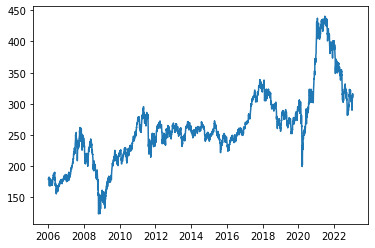

In [ ]:
from matplotlib import pyplot as plt

plt.plot(ksp200['날짜'], ksp200['체결가'])

<BarContainer object of 4214 artists>

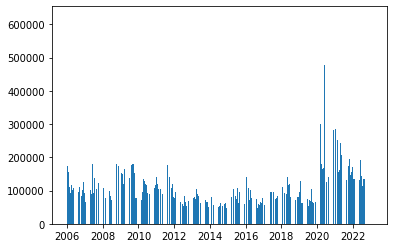

In [ ]:
plt.bar(ksp200['날짜'], ksp200['거래량'])